In [31]:
import nltk
from nltk.corpus import brown
nltk.download('brown')
nltk.download('universal_tagset')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [32]:
corpus=brown.tagged_sents(tagset='universal')
corpus

[[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')], [('The', 'DET'), ('jury', 'NOUN'), ('further', 'ADV'), ('said', 'VERB'), ('in', 'ADP'), ('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB'), ('over-all', 'ADJ'), ('charge', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('election', 'NOUN'), (',', '.'), ('``', '.'), ('deserves', 'VERB'), ('the', 'DET'), ('praise', 'NOUN'), ('and', 'CONJ'), ('thanks', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('City

In [33]:
len(corpus)

57340

In [34]:
inputs=[]
targets=[]
for sentence_tag_pairs in corpus:
  tokens=[]
  target=[]
  for token,tag in sentence_tag_pairs:
    tokens.append(token)
    target.append(tag)
  inputs.append(tokens)
  targets.append(target)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D,Bidirectional
from tensorflow.keras.layers import LSTM,GRU,Embedding,SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [37]:
from sklearn.model_selection import train_test_split
train_inputs,test_inputs,train_targets,test_targets=train_test_split(inputs,targets,test_size=0.3,random_state=0)

In [38]:
train_inputs

[['While',
  'some',
  'think',
  'we',
  'move',
  'too',
  'fast',
  'and',
  'others',
  'too',
  'slowly',
  ',',
  "Florida's",
  'record',
  'is',
  'a',
  'good',
  'one',
  'and',
  'stands',
  'out',
  'among',
  'the',
  '50',
  '.'],
 ['A',
  'man',
  'who',
  'gives',
  'himself',
  'to',
  'God',
  'and',
  'to',
  'the',
  'believers',
  'of',
  'his',
  'church',
  'takes',
  'upon',
  'himself',
  'a',
  'life',
  'of',
  'giving',
  '.'],
 ['He',
  'is',
  'a',
  'fine-looking',
  'colt',
  'with',
  'a',
  'good',
  'body',
  ',',
  'good',
  'set',
  'of',
  'legs',
  'and',
  'nice',
  'way',
  'of',
  'going',
  '.'],
 ['I',
  'kept',
  'saying',
  ',',
  '``',
  'If',
  'I',
  'could',
  'just',
  'build',
  'up',
  'a',
  'reputation',
  'for',
  'myself',
  ',',
  'make',
  'some',
  'real',
  'money',
  ',',
  'get',
  'to',
  'be',
  'well',
  'known',
  'as',
  'an',
  'illustrator',
  '--',
  'like',
  'Peter',
  'Askington',
  ',',
  'for',
  'instance',
  

In [39]:
train_targets

[['ADP',
  'DET',
  'VERB',
  'PRON',
  'VERB',
  'ADV',
  'ADV',
  'CONJ',
  'NOUN',
  'ADV',
  'ADV',
  '.',
  'NOUN',
  'NOUN',
  'VERB',
  'DET',
  'ADJ',
  'NUM',
  'CONJ',
  'VERB',
  'PRT',
  'ADP',
  'DET',
  'NUM',
  '.'],
 ['DET',
  'NOUN',
  'PRON',
  'VERB',
  'PRON',
  'ADP',
  'NOUN',
  'CONJ',
  'ADP',
  'DET',
  'NOUN',
  'ADP',
  'DET',
  'NOUN',
  'VERB',
  'ADP',
  'PRON',
  'DET',
  'NOUN',
  'ADP',
  'VERB',
  '.'],
 ['PRON',
  'VERB',
  'DET',
  'ADJ',
  'NOUN',
  'ADP',
  'DET',
  'ADJ',
  'NOUN',
  '.',
  'ADJ',
  'NOUN',
  'ADP',
  'NOUN',
  'CONJ',
  'ADJ',
  'NOUN',
  'ADP',
  'VERB',
  '.'],
 ['PRON',
  'VERB',
  'VERB',
  '.',
  '.',
  'ADP',
  'PRON',
  'VERB',
  'ADV',
  'VERB',
  'PRT',
  'DET',
  'NOUN',
  'ADP',
  'PRON',
  '.',
  'VERB',
  'DET',
  'ADJ',
  'NOUN',
  '.',
  'VERB',
  'PRT',
  'VERB',
  'ADV',
  'VERB',
  'ADP',
  'DET',
  'NOUN',
  '.',
  'ADP',
  'NOUN',
  'NOUN',
  '.',
  'ADP',
  'NOUN',
  '.',
  'ADV',
  'PRON',
  'VERB',
  'VERB'

In [40]:
test_inputs

[['Muscle',
  'weakness',
  'did',
  'not',
  'improve',
  ',',
  'and',
  'the',
  'patient',
  'needed',
  'first',
  'a',
  'cane',
  ',',
  'then',
  'crutches',
  '.'],
 ['He',
  'replaced',
  'the',
  'flashlight',
  'where',
  'it',
  'had',
  'been',
  'stowed',
  ',',
  'got',
  'into',
  'his',
  'own',
  'car',
  'and',
  'backed',
  'it',
  'out',
  'of',
  'the',
  'garage',
  '.'],
 ['When',
  'he',
  'had',
  'given',
  'the',
  'call',
  'a',
  'few',
  'moments',
  'thought',
  ',',
  'he',
  'went',
  'into',
  'the',
  'kitchen',
  'to',
  'ask',
  'Mrs.',
  'Yamata',
  'to',
  'prepare',
  'tea',
  'and',
  'sushi',
  'for',
  'the',
  'visitors',
  ',',
  'using',
  'the',
  'formal',
  'English',
  'china',
  'and',
  'the',
  'silver',
  'tea',
  'service',
  'which',
  'had',
  'been',
  'donated',
  'to',
  'the',
  'mission',
  ',',
  'then',
  'he',
  'went',
  'outside',
  'to',
  'inspect',
  'the',
  'grounds',
  '.'],
 ['--',
  'On',
  'the',
  'basis',
 

In [41]:
test_targets

[['NOUN',
  'NOUN',
  'VERB',
  'ADV',
  'VERB',
  '.',
  'CONJ',
  'DET',
  'NOUN',
  'VERB',
  'ADV',
  'DET',
  'NOUN',
  '.',
  'ADV',
  'NOUN',
  '.'],
 ['PRON',
  'VERB',
  'DET',
  'NOUN',
  'ADV',
  'PRON',
  'VERB',
  'VERB',
  'VERB',
  '.',
  'VERB',
  'ADP',
  'DET',
  'ADJ',
  'NOUN',
  'CONJ',
  'VERB',
  'PRON',
  'ADP',
  'ADP',
  'DET',
  'NOUN',
  '.'],
 ['ADV',
  'PRON',
  'VERB',
  'VERB',
  'DET',
  'NOUN',
  'DET',
  'ADJ',
  'NOUN',
  'NOUN',
  '.',
  'PRON',
  'VERB',
  'ADP',
  'DET',
  'NOUN',
  'PRT',
  'VERB',
  'NOUN',
  'NOUN',
  'PRT',
  'VERB',
  'NOUN',
  'CONJ',
  'X',
  'ADP',
  'DET',
  'NOUN',
  '.',
  'VERB',
  'DET',
  'ADJ',
  'ADJ',
  'NOUN',
  'CONJ',
  'DET',
  'NOUN',
  'NOUN',
  'NOUN',
  'DET',
  'VERB',
  'VERB',
  'VERB',
  'ADP',
  'DET',
  'NOUN',
  '.',
  'ADV',
  'PRON',
  'VERB',
  'ADV',
  'PRT',
  'VERB',
  'DET',
  'NOUN',
  '.'],
 ['.',
  'ADP',
  'DET',
  'NOUN',
  'ADP',
  'DET',
  'NOUN',
  'NOUN',
  'ADP',
  'NOUN',
  'NOUN',

In [42]:
from nltk.tokenize import word_tokenize
MAX_VOCAB_SIZE=None
should_lowercase=False  #capitalization should be useful
word_tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE,lower=should_lowercase,oov_token='UNK',)   #converting words to sequences

word_tokenizer.fit_on_texts(train_inputs)
train_inputs_int=word_tokenizer.texts_to_sequences(train_inputs)
test_inputs_int=word_tokenizer.texts_to_sequences(test_inputs)

In [43]:
word2idx=word_tokenizer.word_index
v=len(word2idx)
v

47607

In [44]:
#https://stackoverflow.com/questions/11264684/flatten-list-of-lists

In [45]:
def flatten(list_of_lists):
  flattened=[val for sublist in list_of_lists for val in sublist]
  return flattened

In [46]:
all_train_targets=set(flatten(train_targets))
all_train_targets

{'.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X'}

In [47]:
all_test_targets=set(flatten(test_targets))
all_test_targets

{'.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X'}

In [48]:
all_train_targets=all_test_targets

In [49]:
tag_tokenizer=Tokenizer()              #converting targets to sequences
tag_tokenizer.fit_on_texts(train_targets)
train_targets_int=tag_tokenizer.texts_to_sequences(train_targets)
test_targets_int=tag_tokenizer.texts_to_sequences(test_targets)

In [50]:
train_targets_int_unpadded=train_targets_int #saving for later
test_targets_int_unpadded=test_targets_int

In [51]:
maxlen_train=max(len(sent) for sent in train_inputs)
maxlen_test=max(len(sent) for sent in test_inputs)
T=max((maxlen_train,maxlen_test))

In [52]:
train_inputs_int=pad_sequences(train_inputs_int,maxlen=T)    #padding sequences so that we get NXT matrices
print(train_inputs_int.shape)   #shape of data train tensor
test_inputs_int=pad_sequences(test_inputs_int,maxlen=T)
print(test_inputs_int.shape)
train_targets_int=pad_sequences(train_targets_int,maxlen=T)
print(train_targets_int.shape)
test_targets_int=pad_sequences(test_targets_int,maxlen=T)
print(test_targets_int.shape)

(40138, 180)
(17202, 180)
(40138, 180)
(17202, 180)


In [53]:
k=len(tag_tokenizer.word_index)+1
k

13

In [54]:
D=32
i=Input(shape=(T,))
x=Embedding(v+1,D,mask_zero=True)(i)
x=Bidirectional(LSTM(32,return_sequences=True))(x)
x=Dense(k)(x)
model=Model(i,x)

In [55]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

In [56]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 180, 32)           1523456   
                                                                 
 bidirectional_1 (Bidirectio  (None, 180, 64)          16640     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 180, 13)           845       
                                                                 
Total params: 1,540,941
Trainable params: 1,540,941
Non-trainable params: 0
_________________________________________________________________


In [57]:
r=model.fit(train_inputs_int,train_targets_int,epochs=5,validation_data=(test_inputs_int,test_targets_int))

Epoch 1/5
1255/1255 [==============================] - 204s 156ms/step - loss: 0.4665 - accuracy: 0.8595 - val_loss: 0.1132 - val_accuracy: 0.9645
Epoch 2/5
1255/1255 [==============================] - 170s 135ms/step - loss: 0.0708 - accuracy: 0.9780 - val_loss: 0.0883 - val_accuracy: 0.9716
Epoch 3/5
1255/1255 [==============================] - 170s 136ms/step - loss: 0.0436 - accuracy: 0.9861 - val_loss: 0.0857 - val_accuracy: 0.9729
Epoch 4/5
1255/1255 [==============================] - 172s 137ms/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0885 - val_accuracy: 0.9732
Epoch 5/5
1255/1255 [==============================] - 168s 134ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0918 - val_accuracy: 0.9733


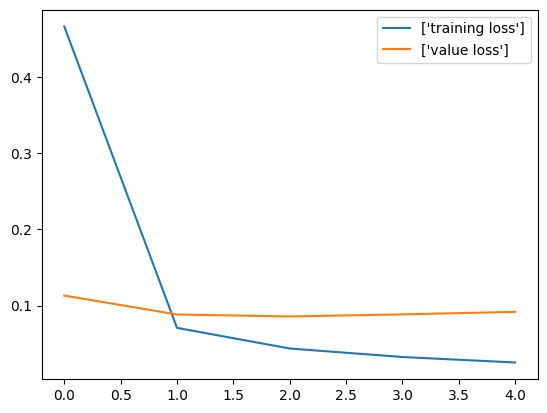

In [58]:
plt.plot(r.history['loss'],label=['training loss'])
plt.plot(r.history['val_loss'],label=['value loss'])
plt.legend()

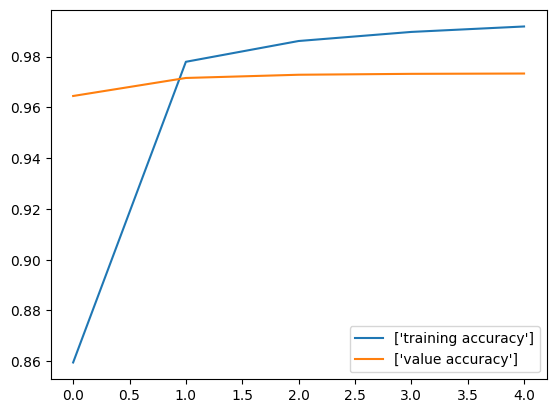

In [59]:
plt.plot(r.history['accuracy'],label=['training accuracy'])
plt.plot(r.history['val_accuracy'],label=['value accuracy'])
plt.legend()

In [60]:
train_lengths=[]
for sentence in train_inputs:
  train_lengths.append(len(sentence))
test_lengths=[]
for sentence in test_inputs:
  test_lengths.append(len(sentence))

In [61]:
train_probs=model.predict(train_inputs_int)
train_predictions=[]
for probs,length in zip(train_probs,train_lengths):
  probs_=probs[-length:]
  preds=np.argmax(probs_,axis=1)
  train_predictions.append(preds)
flat_train_predictions=flatten(train_predictions)
flat_train_targets=flatten(train_targets_int_unpadded)
test_probs=model.predict(test_inputs_int)
test_predictions=[]
for probs,length in zip(test_probs,test_lengths):
  probs_=probs[-length:]
  preds=np.argmax(probs_,axis=1)
  test_predictions.append(preds)
flat_test_predictions=flatten(test_predictions)
flat_test_targets=flatten(test_targets_int_unpadded)

538/538 [==============================] - 15s 28ms/step


In [62]:
from sklearn.metrics import accuracy_score,f1_score
print('training accuracy=',accuracy_score(flat_train_targets,flat_train_predictions))
print('testing accuracy=',accuracy_score(flat_test_targets,flat_test_predictions))
print('training f1 score=',f1_score(flat_train_targets,flat_train_predictions,average='macro'))
print('test f1 score=',f1_score(flat_test_targets,flat_test_predictions,average='macro'))

training accuracy= 0.9943593510866238
testing accuracy= 0.9733365849693126
training f1 score= 0.9887214329698266
test f1 score= 0.9271523452135639
